In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



# step 1 데이터 구성하기

In [16]:
df = pd.read_csv("Concrete.csv", engine='python')
df

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
df_y = df['CONCRETE_COMPRESSIVE_STRENGTH']
df_x = df.drop('CONCRETE_COMPRESSIVE_STRENGTH', axis=1, inplace=False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, train_size =0.4, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_test_x, df_test_y, train_size =0.5, random_state=1234)

print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("valid data X size : ", df_valid_x.shape)
print("valid data Y size : ", df_valid_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (412, 8)
train data Y size :  (412,)
valid data X size :  (309, 8)
valid data Y size :  (309,)
test data X size :  (309, 8)
test data Y size :  (309, 8)


# step 2 모델 생성

# 모델 parameter 조정(n_estimator)

In [18]:
train_score = []
valid_score = []
para_n_tree = [n_tree * 5 for n_tree in range(1,50)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = valid_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,5,0.438,0.421
1,10,0.635,0.609
2,15,0.742,0.708
3,20,0.800,0.764
4,25,0.838,0.802
5,30,0.863,0.825
6,35,0.880,0.841
7,40,0.893,0.855
8,45,0.903,0.864
9,50,0.911,0.873


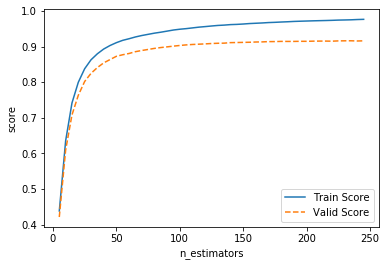

In [19]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

n_estimator는 235일때 가장 성능이 좋으므로 n_estimator는 235를 선택하였다.

# parameter 조정 (min_sample_leaf)

In [20]:
train_score = []
valid_score = []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=235, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = valid_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.976,0.917
1,2,0.976,0.912
2,3,0.975,0.918
3,4,0.973,0.914
4,5,0.971,0.916
5,6,0.970,0.914
6,7,0.968,0.918
7,8,0.966,0.918
8,9,0.966,0.919
9,10,0.966,0.923


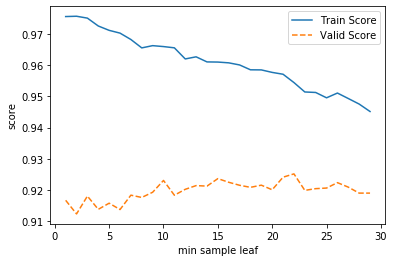

In [21]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample leaf")
plt.legend()



leaf=22일때, 가장 성능이 좋은것으로 판단되어 leaf를 22으로 선택하였다. 

# parameter 조정 (min_samples_split)

In [25]:
train_score = []
valid_score = []
para_split = [n_split * 2 for n_split in range(1,31)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=235, min_samples_leaf=22, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["ValidScore"] = valid_score
df_score_split.round(3)



,MinSamplesSplit,TrainScore,ValidScore
0,2,0.954,0.925
1,4,0.954,0.925
2,6,0.954,0.925
3,8,0.954,0.925
4,10,0.954,0.925
5,12,0.954,0.925
6,14,0.954,0.925
7,16,0.954,0.925
8,18,0.954,0.925
9,20,0.954,0.925


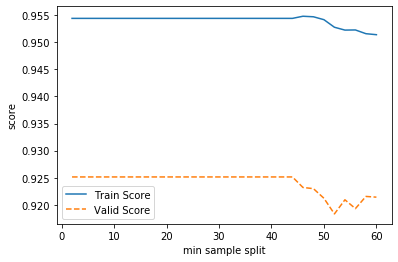

In [26]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, valid_score, linestyle="--", label="Valid Score")
plt.ylabel("score")
plt.xlabel("min sample split")
plt.legend()

split은 44일 때 가장 좋은 성능을 보이므로 split을 44로 설정하였다.

# parameter 조정 (max_depth)

In [30]:
train_score = []
valid_score = []
para_depth = [depth for depth in range(1,30)]
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=235, min_samples_leaf=22, min_samples_split=44, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))

    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["ValidScore"] = valid_score
df_score_depth.round(3)



,Depth,TrainScore,ValidScore
0,1,0.863,0.871
1,2,0.930,0.915
2,3,0.954,0.925
3,4,0.967,0.923
4,5,0.974,0.926
5,6,0.978,0.925
6,7,0.980,0.929
7,8,0.982,0.929
8,9,0.983,0.926
9,10,0.983,0.929


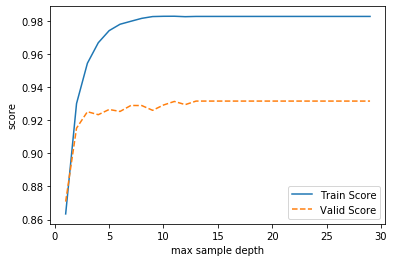

In [31]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, valid_score, linestyle="--", label= "Valid Score")
plt.ylabel("score")
plt.xlabel("max sample depth")
plt.legend()

depth는 13일때 가장 성능이 좋으므로 depth를 13으로 결정하였다. 

In [32]:
train_score = []
valid_score = []
para_lr = [lr * 0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=235, min_samples_leaf=22, min_samples_split=44
                               , max_depth=13, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    valid_score.append(gb.score(df_valid_x, df_valid_y))

    
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = valid_score
df_score_lr.round(3)



,LearningRate,TrainScore,TestScore
0,0.1,0.983,0.932
1,0.2,0.990,0.934
2,0.3,0.993,0.926
3,0.4,0.993,0.915
4,0.5,0.994,0.912
5,0.6,0.994,0.905
6,0.7,0.994,0.888
7,0.8,0.994,0.865
8,0.9,0.994,0.839


learning rate는 0.2일때 성능이 가장 좋으므로, learning rate는 0.2로 선택하였다.

# Step3 최종모델선정

In [37]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=235, min_samples_leaf=44, min_samples_split=22
                               , max_depth=13,learning_rate=0.2)
gb_final.fit(df_train_x, df_train_y)
print("score on training set : ", gb_final.score(df_train_x,df_train_y))
print("score on valid set : ", gb_final.score(df_valid_x,df_valid_y))



score on training set :  0.9711429638632135
score on valid set :  0.9234913507248841


training set은 97.11%, valid set은 92.34%임을 알 수 있다. 

In [39]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.333
0,CEMENT,0.291
3,WATER,0.169
1,BLAST_FURNACE_SLAG,0.078
4,SUPERPLASTICIZER,0.062
6,FINE_AGGREGATE,0.036
5,COARSE_AGGREGATE,0.021
2,FLY_ASH,0.010


Text(0, 0.5, '변수')

/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eosumin/opt/anaconda3/lib/python3.7/site-package

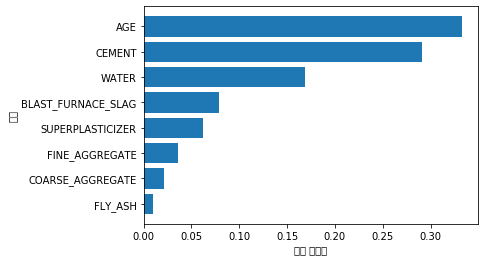

In [40]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

콘크리트 강도는 AGE,CEMENT, WATER, SUPERPLATICIZER 순으로 영향을 주는 것을 알 수있다. 

# TEST 결과

In [41]:
pred = gb_final.predict(df_test_x)
error = df_test_y - pred
mse = np.mean(error * error)
mae = np.mean(abs(error))
print("MSE : " , mse)
print("MAE : ", mae)

MSE :  23.245255901209344
MAE :  3.5810679927957296


In [42]:
print("score on training set : ", gb_final.score(df_train_x,df_train_y))
print("score on test set : ", gb_final.score(df_test_x,df_test_y))

score on training set :  0.9711429638632135
score on test set :  0.9181262152371025


training set은 97.11%, test set은 91.81%로 이전에 학습했던 valid set에 거의 근사하게 학습되었다고 생각할 수 있다.
이전에 제출했던 과제인 의사결정나무와 랜덤포레스트로 분석한 결과 그래디언트 부스트가 test score도 높고, mse값 역시 더 낮으므로 성능이 좋은 모델임을 알 수 있다. 